In [1]:
import os
import pandas
import codecs
import glob
import pandas as pd
import csv
import numpy as np
from numpy import *
import re
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
from pandas import Series,DataFrame
import pandas as pd


text = []
label = []

path = r"C:\Users\hbyluc\Desktop\文件\高级ML\TP project1\presidents-speeches"
president_names = os.listdir(path)

for president in president_names:
    speeches = os.listdir(path + "\\" + president + "\\speeches")
    num_speeches = len(speeches)
    i=1
    for speech in speeches:
        f = open(path + "\\" +president + "\\speeches\\" + speech, "r")
        content = f.read()
        text.append(content)
        label.append(president)

In [4]:
names = ['AJ',
         'BO',
         'BC',
         'DT',
         'FD.R',
         'GH.W.B',
         'GW.B',
         'GW',
         'RM.N',
         'RR',
         'TJ']

In [5]:
df=pd.DataFrame()
df['text'] = text
df['label'] = label

In [6]:
df['text']

0      b'To the Senate of the United States:\nIt appe...
1      b'To the Senate of the United States:\nHaving ...
2      b'Fellow Citizens of the Senate and House of R...
3      b'By Andrew Jackson, President of the United S...
4      b'I have attentively considered the resolution...
                             ...                        
371    b"TO BROTHER HANDSOME LAKE:           I have r...
372    b'To the Senate and House of Representatives o...
373    b"  TO THE SENATE AND HOUSE OF REPRESENTATIVES...
374    b'TO THE SENATE AND HOUSE OF REPRESENTATIVES O...
375    b"  To the Senate and House of Representatives...
Name: text, Length: 376, dtype: object

In [7]:
df['label']

0        Andrew Jackson
1        Andrew Jackson
2        Andrew Jackson
3        Andrew Jackson
4        Andrew Jackson
             ...       
371    Thomas Jefferson
372    Thomas Jefferson
373    Thomas Jefferson
374    Thomas Jefferson
375    Thomas Jefferson
Name: label, Length: 376, dtype: object

In [8]:
data = pd.concat([df['text'],df['label']],axis=1)

In [9]:
data.columns = ['data','target']
data

,data,target
0,b'To the Senate of the United States:\nIt appe...,Andrew Jackson
1,b'To the Senate of the United States:\nHaving ...,Andrew Jackson
2,b'Fellow Citizens of the Senate and House of R...,Andrew Jackson
3,"b'By Andrew Jackson, President of the United S...",Andrew Jackson
4,b'I have attentively considered the resolution...,Andrew Jackson
...,...,...
371,"b""TO BROTHER HANDSOME LAKE: I have r...",Thomas Jefferson
372,b'To the Senate and House of Representatives o...,Thomas Jefferson
373,"b"" TO THE SENATE AND HOUSE OF REPRESENTATIVES...",Thomas Jefferson
374,b'TO THE SENATE AND HOUSE OF REPRESENTATIVES O...,Thomas Jefferson


In [10]:
train, test = train_test_split(data, test_size = 0.2)

In [11]:
train.reset_index(drop=True,inplace=True)
train.shape

(300, 2)

In [12]:
import spacy
from html import unescape

# create a spaCy tokenizer
spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

def my_preprocessor(doc):
    return(doc.lower())

# tokenize the doc and lemmatize its tokens
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

In [13]:
count_vect = CountVectorizer()
count_vect.fit(train.data.tolist())
X_train_vect = count_vect.transform(train.data.tolist())

In [14]:
X_ = X_train_vect.toarray()
y_ = train.target.tolist()

In [25]:
clf_ = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf_.fit(X_,y_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [26]:


# Testing model accuracy

X_test_vect = count_vect.transform(test.data.tolist())
X_tst = X_test_vect.toarray()
y_tst = test.target.tolist()

# predict the classes of our test texts
prediction = clf_.predict(X_tst)

# get the accuracy of our model's prediction
print(accuracy_score(y_tst, prediction))

0.5789473684210527


In [27]:
_prediction = pd.DataFrame(prediction)
_real = pd.DataFrame(y_tst)

In [28]:
_prediction

,0
0,George W. Bush
1,George W. Bush
2,Thomas Jefferson
3,Andrew Jackson
4,George W. Bush
...,...
71,George W. Bush
72,Andrew Jackson
73,Bill Clinton
74,Franklin D. Roosevelt


In [29]:
_real

,0
0,George W. Bush
1,Bill Clinton
2,George Washington
3,Andrew Jackson
4,George W. Bush
...,...
71,George W. Bush
72,Andrew Jackson
73,Bill Clinton
74,Franklin D. Roosevelt


In [30]:
params = {
    'figure.figsize': '8, 4'
}
plt.rcParams.update(params)

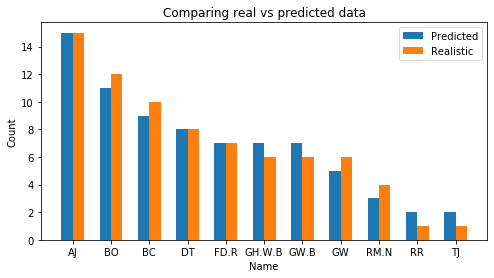

In [31]:
jj = {"Predicted":_prediction[0].tolist(),"Realistic":y_tst}
df = pd.DataFrame(jj)

index = np.arange(len(names))
bar_width = 0.3



fig, ax = plt.subplots()
predicted = ax.bar(index, df["Predicted"].value_counts(), bar_width,
                label="Predicted")

realistic = ax.bar(index+bar_width, df["Realistic"].value_counts(),
                 bar_width, label="Realistic")

ax.set_xlabel('Name')
ax.set_ylabel('Count')
ax.set_title('Comparing real vs predicted data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names)
ax.legend()

plt.show()